# Visualize CESM2-LE Catalog

In [72]:
import pandas as pd
from graphviz import Digraph

In [141]:
df = pd.read_csv('cesm_yearly.csv').drop(columns=['Unnamed: 0'])

# Assign experiment numbers less than 1200 to be the control run
df.loc[df.experiment_number < 1200, 'experiment'] = 'control' 

In [144]:
# Create Digraph object - use the left to right orientation instead of vertical
dot = Digraph(graph_attr={'rankdir': 'LR'})

# Start counting at one for node numbers
num_node = 1

# Loop through the different experiments
for experiment in df.experiment.unique():
    exp_i = num_node
    dot.node(str(exp_i), label=f'experiment: \n {experiment}')
    num_node += 1
    
    for experiment_number in sorted(df.loc[df.experiment == experiment].experiment_number.unique()):
        exp_num_i = num_node
        dot.node(str(exp_num_i), label=f'model year: \n {experiment_number}')
        dot.edge(str(exp_i), str(exp_num_i))
        num_node += 1
        
        for forcing in df.loc[(df.experiment == experiment) &
                              (df.experiment_number == experiment_number)].forcing.unique():
            force_i = num_node
            # Find number of members
            mem_num = len(df.loc[(df.experiment == experiment) &
                                 (df.experiment_number == experiment_number) & 
                                 (df.forcing == forcing)].member_id.unique())
            dot.node(str(force_i), label=f'forcing: {forcing} \n # members: {mem_num}')
            dot.edge(str(exp_num_i), str(force_i))
            num_node += 1
        exp_num_i += 1
    exp_i += 1

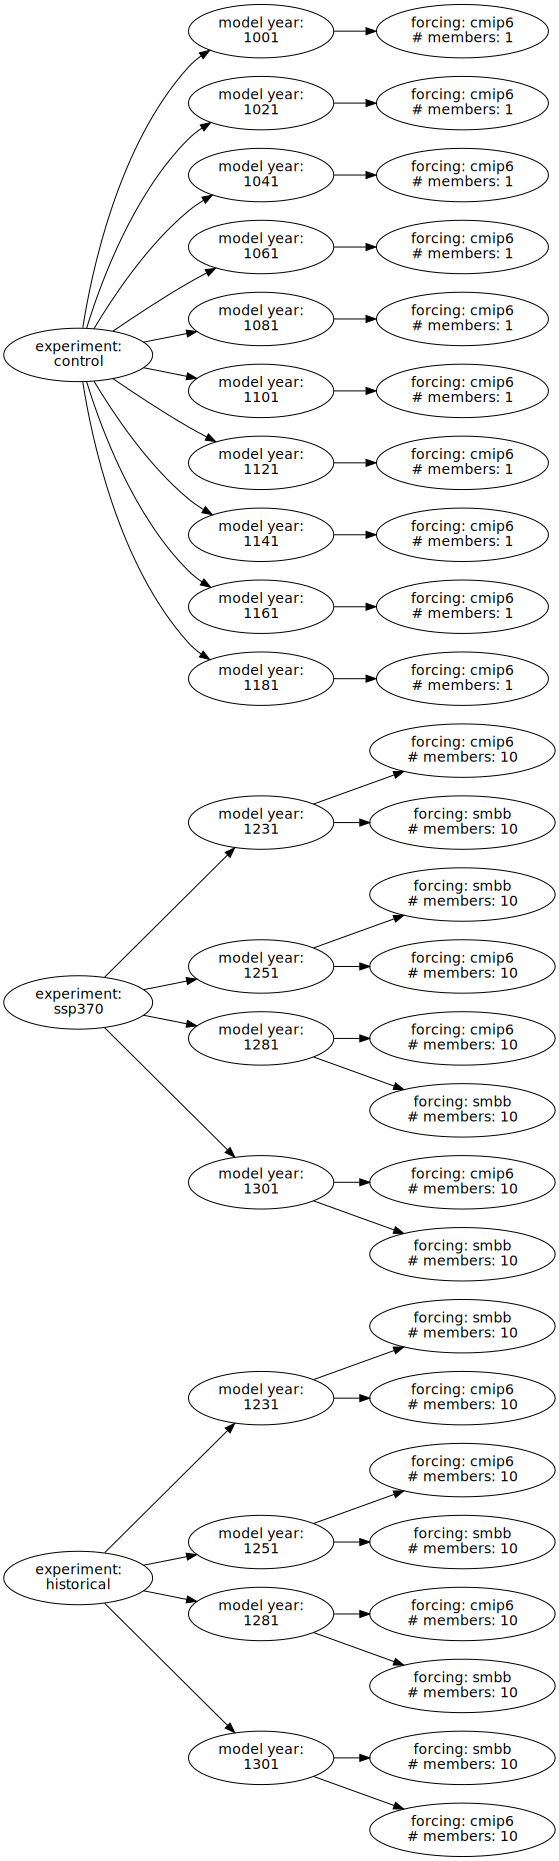

In [145]:
dot